## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling and Data Processing](#section3)
4. [Questions](#section4)
    - 4.1 [Off all the genres,which ones are common in most of the movies?](#section401)<br/>
    - 4.2 [In which year did most of the movies released?](#section402)<br/>
    - 4.3 [Top 10 movies which has generated the highest revenue?](#section403)<br/>
    - 4.4 [Top 20 movies having some common genres in all of them.?](#section404)<br/>
    - 4.5 [Establish coorelation between all the features using heatmap.](#section405)<br/>
    - 4.6 [How is Rating affected by Runtime of the movie ?](#section406)<br/>
    - 4.7 [How many actors have acted in more than one movie?](#section407)<br/>
    - 4.8 [How many directors have directed more than one movie?](#section408)<br/>
    - 4.9 [How are Metascore and Rating dependent?](#section409)<br/>
    - 4.10 [Hypothesis: Action movies is liked more by most of the people](#section410)<br/>
5. [Conclusions](#section5)<br/>  

<a id=section1></a> 
## 1. Problem Statement !
<img src="1000.jpg"/>
"This dataset is 1,000 most popular movies on IMDB in the last 10 years.Various variables present in the dataset includes data of Title, Genre, Description, Director, Actors, Year, Runtime, Rating, Votes, Revenue, Metascrore"
<a id=section1></a> 


<a id=section2></a> 
### 2.  Data Loading and Description
Here's a data set of 1000 movies.The data fields included are:</br>


<i>Rank</i>- Movie rank order 


<i>Title</i>-The title of the film


<i>Genre</i>- A comma-separated list of genres used to classify the film


<i>Description</i>- Brief one-sentence movie summary


<i>Director</i>- The name of the film's director


<i>Actors</i>- A comma-separated list of the main stars of the film


<i>Year</i>- The year that the film released as an integer.


<i>Runtime (Minutes)</i>- The duration of the film in minutes.


<i>Rating</i>- User rating for the movie 0-10


<i>Votes</i>- Number of votes


<i>Revenue</i> (Millions)- Movie revenue in millions


<i>Metascore</i>- An aggregated average of critic scores. Values are between 0 and 100. Higher scores represent positive reviews.


#### Importing packages

In [4]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

#### Importing the Dataset

In [5]:
movies_df=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv")
movies_df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


<a id=section3></a> 
## Data Profiling and Data Processing

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [130]:
profile = pandas_profiling.ProfileReport(movies_df)
profile.to_file(outputfile="1000_movies_preprocessing.html")

Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __1000_movies_preprocessing.html__. Take a look at the file and see what useful insight you can develop from it. <br/>
Now we will process our data to better understand it.

In [49]:
df.loc[:,['Runtime (Minutes)','Rating','Votes','Revenue (Millions)','Metascore']].shape

(1000, 5)

In [50]:
f=(
    df.loc[:,['Rating','Votes','Revenue (Millions)','Metascore']]
#    .applymap(lambda v: int(v) if str.isdecimal(v) else np.nan)
    .dropna()
    )
f

,Rating,Votes,Revenue (Millions),Metascore
0,8.1,757074,333.13,76.0
1,7.0,485820,126.46,65.0
2,7.3,157606,138.12,62.0
3,7.2,60545,270.32,59.0
4,6.2,393727,325.02,40.0
5,6.1,56036,45.13,42.0
6,8.3,258682,151.06,93.0
8,7.1,7188,8.01,78.0
9,7.0,192177,100.01,41.0
10,7.5,232072,234.02,66.0


In [51]:
f.shape

(838, 4)

In [ ]:
movies_df[movies_df["Revenue (Millions)"].isnull()]


In [ ]:
'''Filling blank the revenues for the movies having NAN value from GOOGLE'''

movies_df_new=movies_df.copy(deep=True)
movies_df_new[movies_df_new["Revenue (Millions)"].isnull()]
movies_df_new[movies_df_new["Title"]=="Mindhorn"]=movies_df_new[movies_df_new["Title"]=="Mindhorn"].iloc[:,10:11].fillna(0.81)
movies_df_new[movies_df_new["Title"]=="The Last Face"]=movies_df_new[movies_df_new["Title"]=="The Last Face"].iloc[:,10:11].fillna(0.70)


In [ ]:

'''Droping the below row as most of its info is misssing'''

display(movies_df[movies_df["Title"]=="No Country for Old Men"])
movies_df_new=movies_df_new.drop([136])
movies_df_new.ix([123])

<a id=section4></a> 

### 4. Questions

<a id=section401></a> 

### 4.1 Off all the genres,which ones are common in most of the movies?<a id=section401></a> 

In [36]:
import matplotlib.pyplot as plt
import pandas as pd 
df=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv" ,encoding="latin1")
df[df['Genre'].str.contains("Sci-Fi")]
genre=[]
temp_list=[]
unique_genre=[]
genre_count={}
for x in df["Genre"]:
    genre=x.split(",")
    temp_list=temp_list + genre
unique_genre=(list(set(temp_list)))

In [37]:
#print(temp_list)

for x in unique_genre[:-1]:
    genre_count[x]=temp_list.count(x)
    
print(genre_count)

{'Comedy': 279, 'Sci-Fi': 120, 'Western': 7, 'Family': 51, 'Crime': 150, 'Animation': 49, 'Music': 16, 'Musical': 5, 'Action': 303, 'Thriller': 195, 'Sport': 18, 'Drama': 513, 'History': 29, 'War': 13, 'Adventure': 259, 'Horror': 119, 'Mystery': 106, 'Fantasy': 101, 'Biography': 81}


<module 'matplotlib.pyplot' from 'C:\\Users\\juet\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

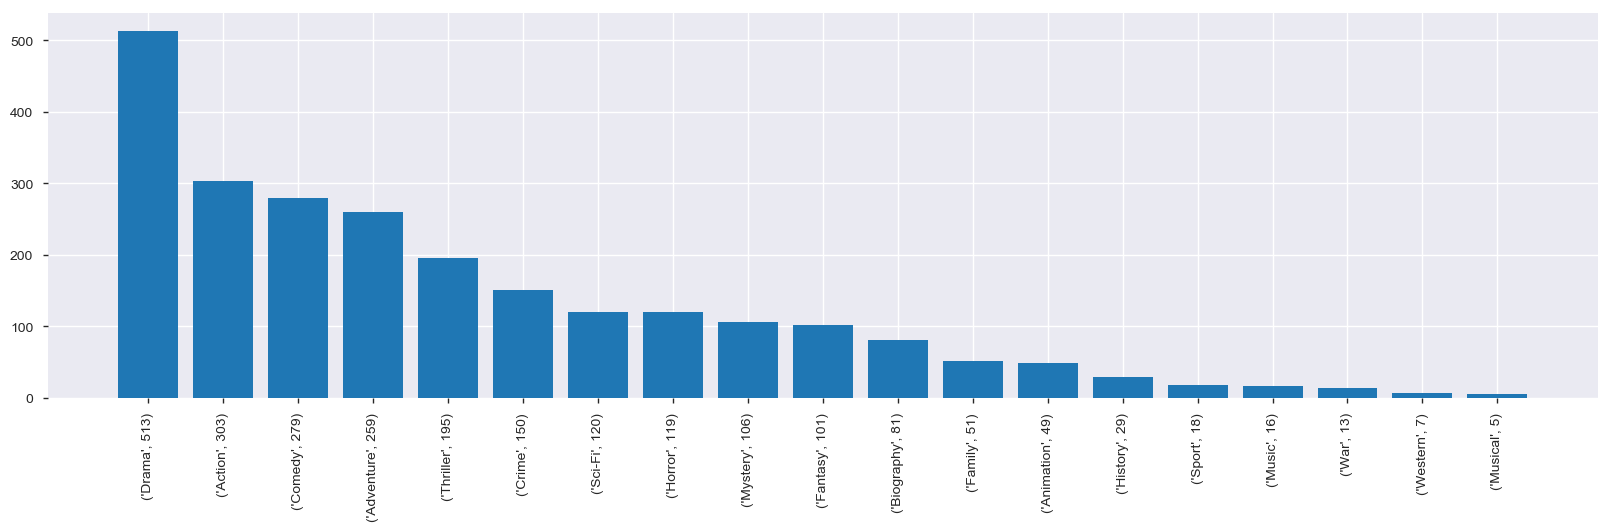

In [38]:
#Below Plot represents -->Users has Taste for the which genre/elements in these movies.
# Top Genres->War,Biography,Sci-fi

plt.figure(figsize=(20,5))
plt.bar(range(len(genre_count)), list(sorted(genre_count.values(), reverse=True)), align='center')
plt.xticks(range(len(genre_count)), list(sorted(genre_count.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)),rotation=90)
# plt.show()
plt

Notice that __513__ movies had __Drama__ and __303__ had __Action__ genre
</br>





<a id=section402></a> 

### 4.2 In which year did most of the movies released?

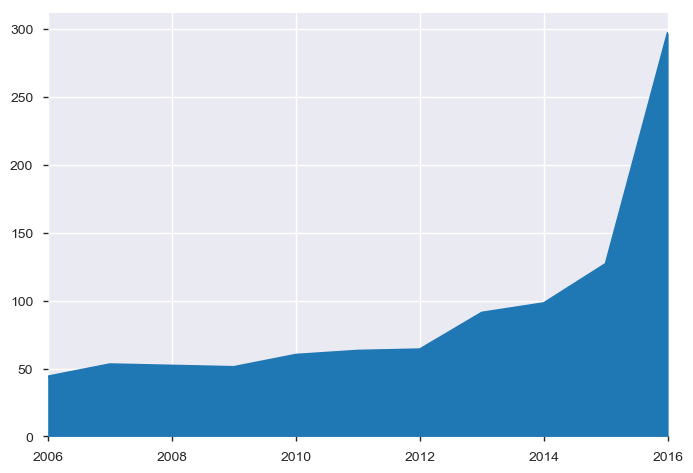

In [41]:
#Histograms of movies released in which years
#Most movies released in 2016

movies_df['Year'].value_counts().sort_index().plot.area(x="Years",y="Frequency")



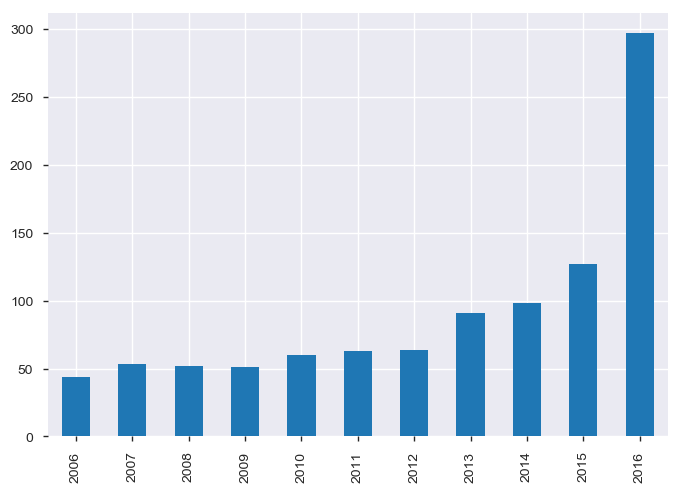

In [42]:
movies_df['Year'].value_counts().sort_index(ascending=True).plot.bar(x="Years",y="Frequency")

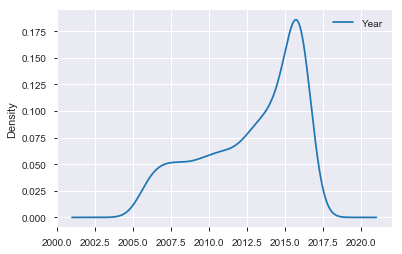

In [78]:
pd.DataFrame(movies_df["Year"]).plot(kind='density')

Note that between the duration of 10 years 2006 - 2016, in 2016 most of the movies were released.

<a id=section403></a> 

### 4.3 Top 10 movies which has generated the highest revenue?

In [44]:
movies_df.set_index(['Title'], drop=True, inplace=True)
movies_df

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
The Great Wall,6,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
La La Land,7,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
Mindhorn,8,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
The Lost City of Z,9,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0


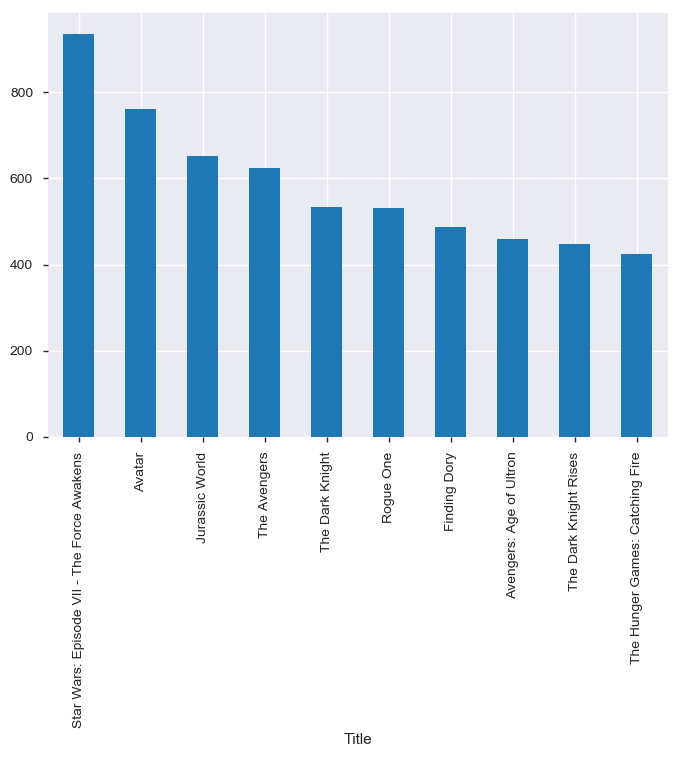

In [45]:
#Top 10 profitable movies

movies_df["Revenue (Millions)"].sort_values(ascending=False).head(10).plot.bar(x="Title",y="Revenue")
 

<a id=section404></a> 

### 4.4 Top 20 movies having some common genres in all of them.

In [6]:
movies_df.set_index(['Title','Genre'], drop=True, inplace=True)
movies_df

,,Rank,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,Genre,,,,,,,,,,
Guardians of the Galaxy,"Action,Adventure,Sci-Fi",1,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,"Adventure,Mystery,Sci-Fi",2,"Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,"Horror,Thriller",3,Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,"Animation,Comedy,Family",4,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,"Action,Adventure,Fantasy",5,A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
The Great Wall,"Action,Adventure,Fantasy",6,European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
La La Land,"Comedy,Drama,Music",7,A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
Mindhorn,Comedy,8,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
The Lost City of Z,"Action,Adventure,Biography",9,"A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0


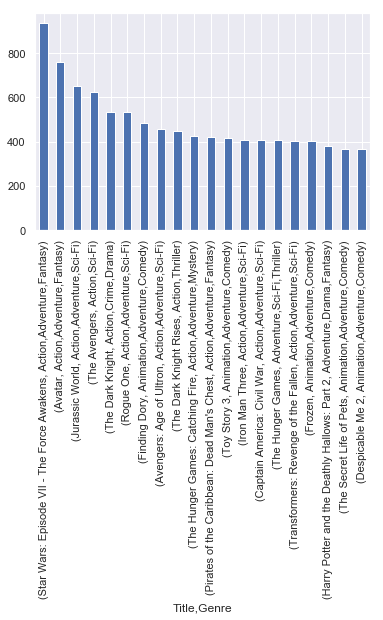

In [7]:
#Top 10 highest revenue movies has one main component in Genre--> ACTION(i)/Animation(ii)
# movies_df.set_index("Genre",inplace=True)
movies_df["Revenue (Millions)"].sort_values(ascending=False).head(20).plot.bar(x="Title",y="Revenue")
 

Note that Action,Adventure and Animation are the Genres which are common in Highest revenue earning movies.

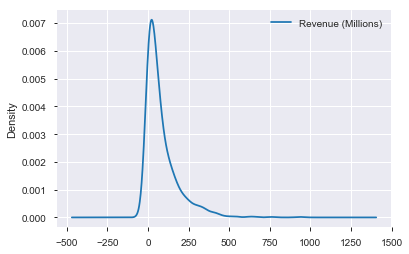

In [80]:
pd.DataFrame(movies_df["Revenue (Millions)"]).plot(kind='density')

Note that the density curve is Lepokurtic and Right skewed. Therefore the average of revenue is shifted between 100 to 200 Millions.

In [52]:
f.corr()

,Rating,Votes,Revenue (Millions),Metascore
Rating,1.000000,0.517452,0.217106,0.672731
Votes,0.517452,1.000000,0.636833,0.332674
Revenue (Millions),0.217106,0.636833,1.000000,0.142397
Metascore,0.672731,0.332674,0.142397,1.000000


<a id=section405></a>

### 4.5 Establish coorelation between all the features using heatmap.

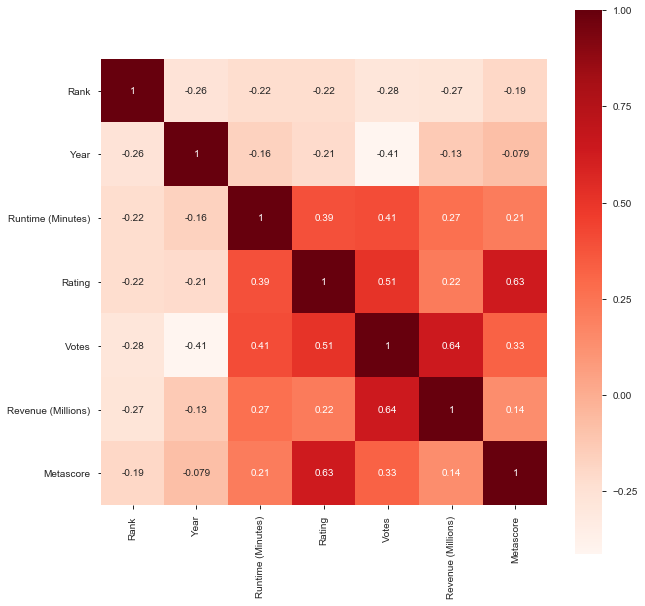

In [53]:
import seaborn as sns
%matplotlib inline
#sns.heatmap(f.head(10), annot=True)


features_correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(features_correlation,vmax=1,square=True,annot=True,cmap='Reds')
plt.show()

<a id=section406></a>

### 4.6 How is Rating affected by Runtime of the movie ?

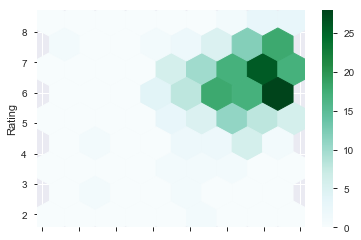

In [65]:
movies_df[(movies_df['Runtime (Minutes)'] > 60) & (movies_df['Runtime (Minutes)'] < 100)].plot.hexbin('Runtime (Minutes)', y='Rating',gridsize=8)
#movies_df["Revenue (Millions)"].sort_values(ascending=False).head(10).plot.bar(x="Title",y='Revenue (Millions)',rot=0)


Movies with Runtime 60-100 mins. has avg  Rating between 5.5 – 7


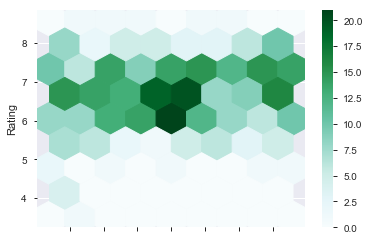

In [66]:
movies_df[(movies_df['Runtime (Minutes)'] > 100) & (movies_df['Runtime (Minutes)'] < 120)].plot.hexbin('Runtime (Minutes)', y='Rating',gridsize=8)
#movies_df["Revenue (Millions)"].sort_values(ascending=False).head(10).plot.bar(x="Title",y='Revenue (Millions)',rot=0)


Movies with Runtime 100-120 mins. has avg  Rating between 5.5 – 7.5


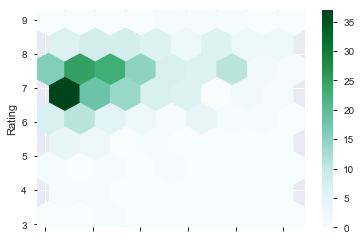

In [67]:
movies_df[(movies_df['Runtime (Minutes)'] > 120) & (movies_df['Runtime (Minutes)'] < 180)].plot.hexbin('Runtime (Minutes)', y='Rating',gridsize=8)
#movies_df["Revenue (Millions)"].sort_values(ascending=False).head(10).plot.bar(x="Title",y='Revenue (Millions)',rot=0)


Movies with runtime 120-180 mins. has avg  Rating between 6.5 - 8

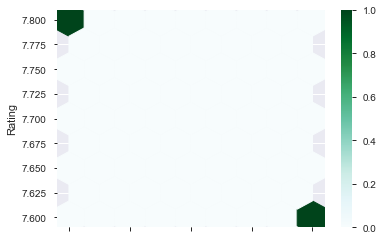

In [77]:
movies_df[(movies_df['Runtime (Minutes)'] > 180) & (movies_df['Runtime (Minutes)'] < 200)].plot.hexbin('Runtime (Minutes)', y='Rating',gridsize=8)
#movies_df["Revenue (Millions)"].sort_values(ascending=False).head(10).plot.bar(x="Title",y='Revenue (Millions)',rot=0)


Movies with runtime >180 mins has avg Rating between 7.6 - 7.8


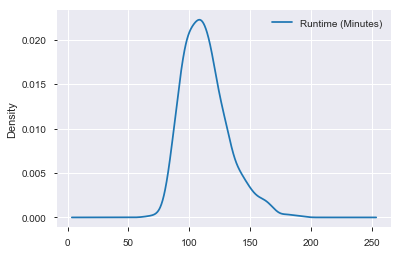

In [81]:
pd.DataFrame(movies_df["Runtime (Minutes)"]).plot(kind='density')

In [ ]:
movies_df[movies_df["Title"]=="Split"]["Revenue (Millions)"]=138.13

In [ ]:
movies_df

In [ ]:
movies_df_new.loc[movies_df["Title"]=="Split","Revenue (Millions)"]=138.13

In [ ]:
movies_df[movies_df["Actors"].isnull()]

<a id=section407></a>

### 4.7 How many actors have acted in more than one movie?

In [29]:
#actors with the most movies acted in 

actor=[]
temp=""
unique_actors=[]
actors_count={}

result= ''
for element in df["Actors"]:
    result += ","+str(element)
result=result[1:]
result=(result.split(","))
sorted(list(set(result)))



[' 50 Cent',
 ' A.C. Peterson',
 ' AJ Michalka',
 ' Aamir Khan',
 ' Aaron Burns',
 ' Aaron Eckhart',
 ' Aaron Paul',
 ' Aaron Taylor-Johnson',
 ' Aaron Yoo',
 ' Aasif Mandvi',
 ' Abbie Cornish',
 ' Abigail Breslin',
 ' Adam Brody',
 ' Adam Campbell',
 ' Adam Devine',
 ' Adam Driver',
 ' Adam G. Sevani',
 ' Adam Levine',
 ' Addison Timlin',
 ' Adewale Akinnuoye-Agbaje',
 ' Adil Hussain',
 ' Adria Arjona',
 ' Adrian Grenier',
 ' Adrian Martinez',
 ' Adrianne Palicki',
 ' AdÃ¨le Exarchopoulos',
 ' Aidan Gillen',
 ' Aidan Turner',
 ' Aiden Longworth',
 ' Akihiro Kitamura',
 ' Alain Moussi',
 ' Alan Alda',
 ' Alan Arkin',
 ' Alan Rickman',
 ' Alan Tudyk',
 ' Albert Brooks',
 ' Albert Finney',
 ' Alden Ehrenreich',
 ' Aldis Hodge',
 ' Alec Baldwin',
 ' Aleksandr Armer',
 ' Alessandro Nivola',
 ' Alex Essoe',
 ' Alex Fisher',
 ' Alex Pettyfer',
 ' Alex R. Hibbert',
 ' Alexander SkarsgÃ¥rd',
 ' Alexandra Daddario',
 ' Alexis Clagett',
 ' Alexis Dziena',
 ' Alfie Allen',
 ' Alfre Woodard',
 ' A

In [111]:
#actors with the most movies acted in 

unique_actors=[]

actor_in_movies={}

result= ''
actor_in_movies={}
for x in movies_df["Actors"]:
    result += ","+str(x)
result=result[1:]

result=(result.split(","))
unique_actors=sorted(list(set(result)))





In [95]:
actor_in_movies={}
for i in result:
    actor_in_movies[i]=result.count(i)
# print(actor_in_movies)
temp_actor_list=sorted(actor_in_movies.items(), key=lambda kv: (kv[1], kv[0]),reverse=True)
temp_actor_list


[('Mark Wahlberg', 11),
 ('Christian Bale', 11),
 ('Will Smith', 9),
 ('Matthew McConaughey', 9),
 ('Leonardo DiCaprio', 9),
 ('Jake Gyllenhaal', 9),
 ('Denzel Washington', 9),
 ('Brad Pitt', 9),
 ('Adam Sandler', 9),
 (' Woody Harrelson', 9),
 (' Rose Byrne', 9),
 ('Tom Hardy', 8),
 ('Tom Hanks', 8),
 ('Robert Downey Jr.', 8),
 ('Johnny Depp', 8),
 ('Jennifer Lawrence', 8),
 ('Daniel Radcliffe', 8),
 (' Scarlett Johansson', 8),
 (' Morgan Freeman', 8),
 (' Michelle Monaghan', 8),
 (' Joel Edgerton', 8),
 (' Hugh Jackman', 8),
 (' Chloë Grace Moretz', 8),
 (' Cate Blanchett', 8),
 (' Anne Hathaway', 8),
 ('Tom Cruise', 7),
 ('Michael Fassbender', 7),
 ('Matt Damon', 7),
 ('Channing Tatum', 7),
 (' Samuel L. Jackson', 7),
 (' Rachel McAdams', 7),
 (' Mark Strong', 7),
 (' Jonah Hill', 7),
 (' Jamie Bell', 7),
 (' Emma Watson', 7),
 (' Emma Stone', 7),
 (' Charlize Theron', 7),
 (' Bradley Cooper', 7),
 (' Ben Kingsley', 7),
 ('Will Ferrell', 6),
 ('Vin Diesel', 6),
 ('Sylvester Stallone

In [105]:
frq_of_movies_acted_in={}
for x in actor_in_movies.values():
    frq_of_movies_acted_in[x]=list(actor_in_movies.values()).count(x)

print(frq_of_movies_acted_in.keys()) #No. of movies 
print(frq_of_movies_acted_in.values())#No. of actors
print(frq_of_movies_acted_in)

dict_keys([3, 1, 7, 6, 2, 5, 9, 8, 4, 11])
dict_values([137, 1674, 14, 33, 354, 67, 9, 14, 90, 2])
{3: 137, 1: 1674, 7: 14, 6: 33, 2: 354, 5: 67, 9: 9, 8: 14, 4: 90, 11: 2}


In [124]:
for x in frq_of_movies_acted_in.keys():
    print(frq_of_movies_acted_in[x] ," actor has acted in only ",x," movies." )

137  actor has acted in only  3  movies.
1674  actor has acted in only  1  movies.
14  actor has acted in only  7  movies.
33  actor has acted in only  6  movies.
354  actor has acted in only  2  movies.
67  actor has acted in only  5  movies.
9  actor has acted in only  9  movies.
14  actor has acted in only  8  movies.
90  actor has acted in only  4  movies.
2  actor has acted in only  11  movies.


<module 'matplotlib.pyplot' from 'C:\\Users\\juet\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

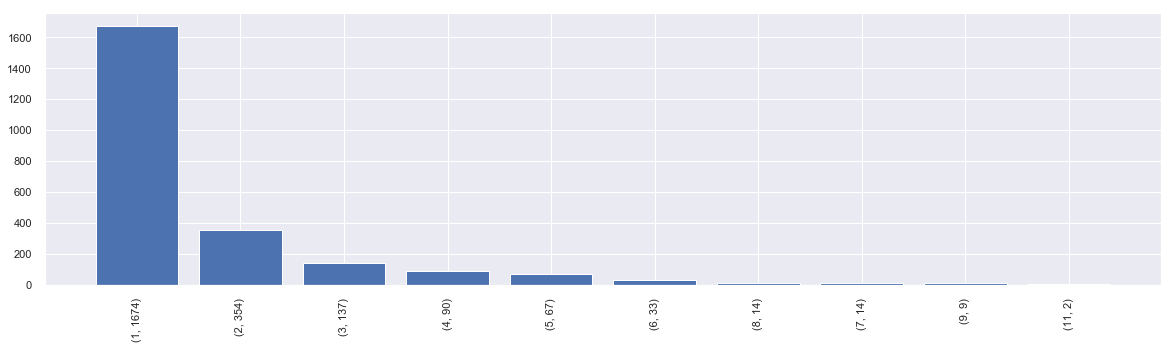

In [106]:
plt.figure(figsize=(20,5))
plt.bar(range(len(frq_of_movies_acted_in)), list(sorted(frq_of_movies_acted_in.values(), reverse=True)), align='center')
plt.xticks(range(len(frq_of_movies_acted_in)), list(sorted(frq_of_movies_acted_in.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)),rotation=90)
# plt.show()
plt

In [ ]:
frq_of_movies_acted_in={}
for x in actor_in_movies.values():
    frq_of_movies_acted_in[x]=list(actor_in_movies.values()).count(x)

print(frq_of_movies_acted_in.keys()) #No. of movies 
print(frq_of_movies_acted_in.values())#No. of actors
print(frq_of_movies_acted_in)

<a id=section408></a>

### 4.8 How many directors have directed more than one movie?

In [114]:
#Directors with the most movies directed 

unique_dir=[]

dir_in_movies={}

result= ''

for x in movies_df["Director"]:
    result += ","+str(x)
result=result[1:]

result=(result.split(","))
unique_dir=sorted(list(set(result)))
len(unique_dir)



644

In [116]:
dir_in_movies={}
for i in result:
    dir_in_movies[i]=result.count(i)
# print(actor_in_movies)
temp_dir_list=sorted(actor_in_movies.items(), key=lambda kv: (kv[1], kv[0]),reverse=True)
dir_in_movies

{'James Gunn': 3,
 'Ridley Scott': 8,
 'M. Night Shyamalan': 6,
 'Christophe Lourdelet': 1,
 'David Ayer': 3,
 'Yimou Zhang': 1,
 'Damien Chazelle': 2,
 'Sean Foley': 1,
 'James Gray': 1,
 'Morten Tyldum': 2,
 'David Yates': 6,
 'Theodore Melfi': 1,
 'Gareth Edwards': 2,
 'Ron Clements': 2,
 'Nacho Vigalondo': 1,
 'Chris Renaud': 1,
 'Mel Gibson': 2,
 'Paul Greengrass': 3,
 'Garth Davis': 1,
 'Denis Villeneuve': 5,
 'Stephen Gaghan': 1,
 'Kenneth Lonergan': 1,
 'Ben Young': 1,
 'Walt Dohrn': 1,
 'Roland Emmerich': 3,
 'Dominique Abel': 1,
 'S.S. Rajamouli': 1,
 'Phillip Guzman': 1,
 'Jon Lucas': 1,
 'Justin Kurzel': 2,
 'John Hamburg': 1,
 'Tom Ford': 1,
 'Bryan Singer': 3,
 'Tim Miller': 1,
 'Paul W.S. Anderson': 6,
 'Anthony Russo': 2,
 'Christopher Nolan': 5,
 'Scott Derrickson': 2,
 'Antoine Fuqua': 5,
 'Patrick Read Johnson': 1,
 'Greg Tiernan': 1,
 'Barry Jenkins': 1,
 'Shawn Burkett': 1,
 'John Lee Hancock': 3,
 'Ricardo de Montreuil': 1,
 'Rob Marshall': 2,
 'John Madden': 1,
 

In [117]:
frq_of_movies_dir_in={}
for x in dir_in_movies.values():
    frq_of_movies_dir_in[x]=list(dir_in_movies.values()).count(x)

print(frq_of_movies_dir_in.keys()) #No. of movies 
print(frq_of_movies_dir_in.values())#No. of directors
print(frq_of_movies_dir_in)

dict_keys([3, 8, 6, 1, 2, 5, 4])
dict_values([49, 1, 4, 444, 109, 11, 26])
{3: 49, 8: 1, 6: 4, 1: 444, 2: 109, 5: 11, 4: 26}


In [125]:
for x in frq_of_movies_dir_in.keys():
    print(frq_of_movies_dir_in[x] ," director has directed only ",x," movies." )

49  director has directed only  3  movies.
1  director has directed only  8  movies.
4  director has directed only  6  movies.
444  director has directed only  1  movies.
109  director has directed only  2  movies.
11  director has directed only  5  movies.
26  director has directed only  4  movies.


<module 'matplotlib.pyplot' from 'C:\\Users\\juet\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

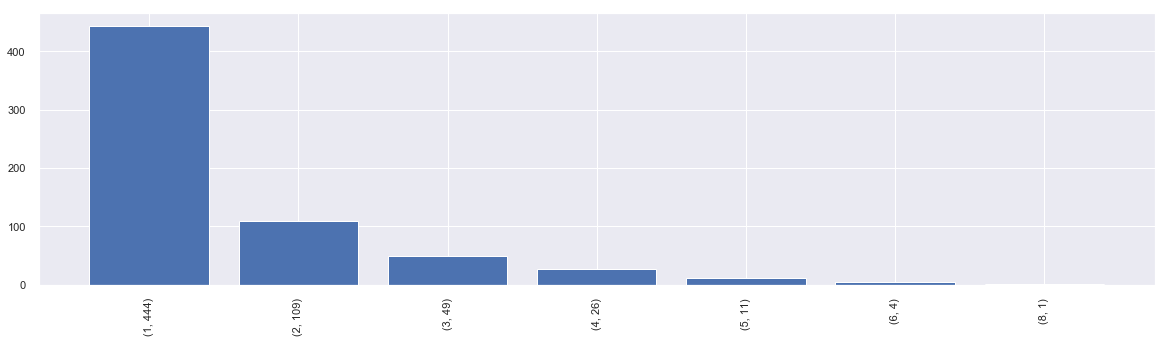

In [126]:
plt.figure(figsize=(20,5))
plt.bar(range(len(frq_of_movies_dir_in)), list(sorted(frq_of_movies_dir_in.values(), reverse=True)), align='center')
plt.xticks(range(len(frq_of_movies_dir_in)), list(sorted(frq_of_movies_dir_in.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)),rotation=90)
# plt.show()
plt

In [ ]:

Metascore groups

# Universal Acclaim	81 - 100
# Generally Favorable Reviews	61 - 80
# Mixed or Average Reviews	40 - 60
# Generally Unfavorable Reviews	20 - 39
# Overwhelming Dislike	0 - 19



In [127]:
movies_df[movies_df["Metascore"]<70]

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
The Great Wall,6,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
Passengers,10,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0
Fantastic Beasts and Where to Find Them,11,"Adventure,Family,Fantasy",The adventures of writer Newt Scamander in New...,David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,7.5,232072,234.02,66.0
Rogue One,13,"Action,Adventure,Sci-Fi",The Rebel Alliance makes a risky move to steal...,Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",2016,133,7.9,323118,532.17,65.0
The Secret Life of Pets,16,"Animation,Adventure,Comedy",The quiet life of a terrier named Max is upend...,Chris Renaud,"Louis C.K., Eric Stonestreet, Kevin Hart, Lake...",2016,87,6.6,120259,368.31,61.0


<a id=section409></a>

In [ ]:
### How are Metascore and Rating dependent?

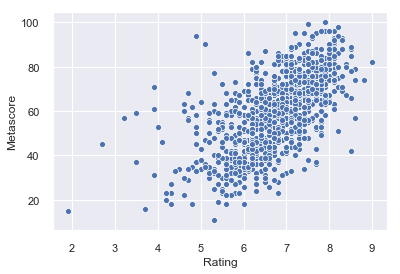

In [86]:
import seaborn as sns

sns.set(color_codes=True)
# sns.boxplot(x="Rating", y="Metascore", data=movies_df)
sns.scatterplot(x="Rating", y="Metascore", data=movies_df)

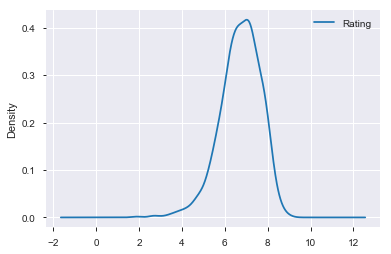

In [83]:
pd.DataFrame(movies_df["Rating"]).plot(kind='density')

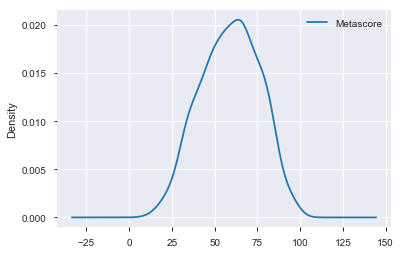

In [82]:
pd.DataFrame(movies_df["Metascore"]).plot(kind='density')

<a id=section410></a>

### 4.10 Hypothesis: Action movies is liked more by most of the people

On studying Questionnaire 4.1 and 4.3 we observed that an overwhelming number of movies has __Action & Drama__ genres in these 1000 movies.
- __513__ movies have __Drama__ out of 1000 movies .
- __303__ movies have __Action__ out of 1000 movies.


__Out of Top 20 highest revenue earning movies 13 movies had Action Genre__.

<a id=section5></a>

## 5. Conclusions 

- __Action ,Adventure and Animation__ are the most liked genres by people from highest earning movies.
- Between 2006 - 2016, most no. of movies were released in __2016__.
- Most of the movies have Metascore between __60 - 75__.
- Most of movies have runtime between __100 – 130 mins__.
